Project 2: Webscraping Analysis

Data scraped was scraped from 2 sources: 
    - https://moz.com/top500 : To grab the 500 most popular global domains as seen by Moz
    - http://urlquery.net/ : To inject each domain and recieve a dynamic analysis on certain website properties:
        *"Url", "IP.Address", "ASN", "IP.Location",
         "Report.Date", "UrlQuery.Alerts", "User.Agent",
         "Snort", "Suricata", "Fortinet", "MDL", "DNS.BH",
         "MS.DNS", "Openfish", "Phishtank", "Spamhaus",
         "JS.ES", "JS.EE", "JS.EW", "HTTP.Tranx"

In [2]:
# command for jupyter notebooks plot display
%matplotlib inline

import os

os.getcwd()

'/Users/intothelight/nycdatascience/deepwaterlearning.github.io/project_02'

In [5]:
import csv
import pandas as pd

# Load the scraped csv data
data_loc ="data/scanned_urls.csv"
website = pd.read_csv(data_loc)
website

,Url,IP.Address,ASN,IP.Location,Report.Date,UrlQuery.Alerts,User.Agent,Snort,Suricata,Fortinet,MDL,DNS.BH,MS.DNS,Openfish,Phishtank,Spamhaus,JS.ES,JS.EE,JS.EW,HTTP.Tranx
0,http://washington.edu,128.95.155.198,AS73 University of Washington,United States,2017-04-29 17:12:42 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,0,0,0,0,0,0,0,11,0,1,51
1,http://fortune.com,54.192.3.50,"AS16509 Amazon.com, Inc.",United States,2017-04-28 20:47:35 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,0,0,0,0,0,0,0,100,42,1,177
2,http://venturebeat.com,192.0.66.2,"AS2635 Automattic, Inc",United States,2017-04-29 00:41:29 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,0,0,0,0,0,0,0,36,0,1,119
3,http://entrepreneur.com,151.101.128.69,"AS6983 Earthlink, Inc.",United States,2017-04-28 20:49:54 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,0,0,0,0,0,0,0,29,3,1,127
4,http://line.me,203.104.138.138,AS38631 LINE Corporation,Japan,2017-04-28 22:47:36 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,0,0,0,0,0,0,0,8,0,0,26
5,http://safedog.cn,110.86.5.91,AS4134 Chinanet,China,2017-04-29 17:57:34 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,0,0,0,0,0,0,0,12,0,2,69
6,http://stanford.edu,171.67.215.200,AS32 Stanford University,United States,2017-04-29 01:09:31 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,0,0,0,0,0,0,0,10,0,0,42
7,http://baiyewang.com,221.234.43.212,AS4134 Chinanet,China,2017-04-29 18:01:03 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,0,0,0,0,0,0,0,7,0,2,90
8,http://w3.org,128.30.52.45,AS3 Massachusetts Institute of Technology,United States,2017-04-28 22:20:40 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,0,0,0,0,0,0,0,2,0,0,52
9,http://doubleclick.net,216.58.201.174,AS15169 Google Inc.,United States,2017-04-28 20:21:21 CET,0,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,0,0,0,0,0,0,0,0,0,8,0,0,50


In [17]:
website["IP.Location"]

0           United States
1           United States
2           United States
3           United States
4                   Japan
5                   China
6           United States
7                   China
8           United States
9           United States
10              Australia
11                 France
12          United States
13          United States
14          United States
15                Denmark
16          United States
17          United States
18          United States
19          United States
20                Germany
21          United States
22          United States
23                 Norway
24          United States
25          United States
26          United States
27          United States
28            Netherlands
29          United States
              ...        
445         United States
446         United States
447                Canada
448                 China
449                France
450         United States
451         United States
452    Russi

29


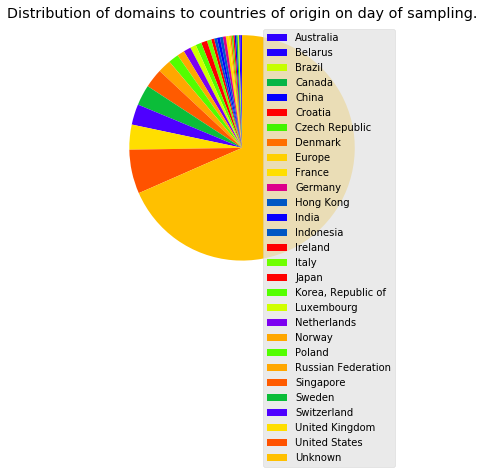

In [42]:
%matplotlib inline
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')

keys = [i[0] for i in stats.itemfreq(website["IP.Location"])]
counts = [int(i[1]) for i in stats.itemfreq(website["IP.Location"])]
counts = sorted(counts)

print len(keys)

cmap = plt.cm.prism
colors = cmap(np.random.rand(len(keys)))
patches, texts = plt.pie(counts,colors=colors, startangle=90)
plt.legend(patches, labels = keys)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Distribution of domains to countries of origin on day of sampling.')
plt.tight_layout()
plt.show()
